<a href="https://colab.research.google.com/github/Roopchand5410/ML_project/blob/main/Final__credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing necessary models

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE
from pylab import rcParams

# Set random seed and plot size
rcParams['figure.figsize'] = 14, 8
LABELS = ["Normal", "Fraud"]


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml_project/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#Data preprocessing

In [5]:
data.isnull().values.any()

False

In [6]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


<ipython-input-63-26fdd254c008>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort=True)


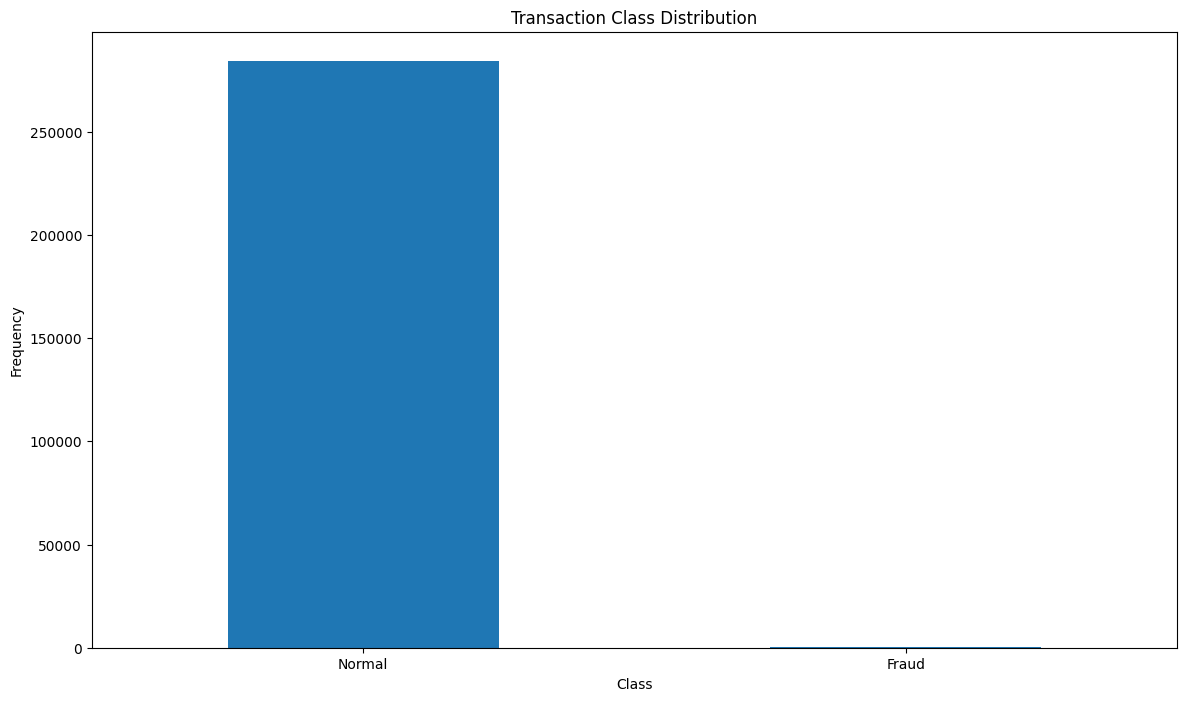

In [ ]:
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [7]:
fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [ ]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [ ]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [8]:
normal.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


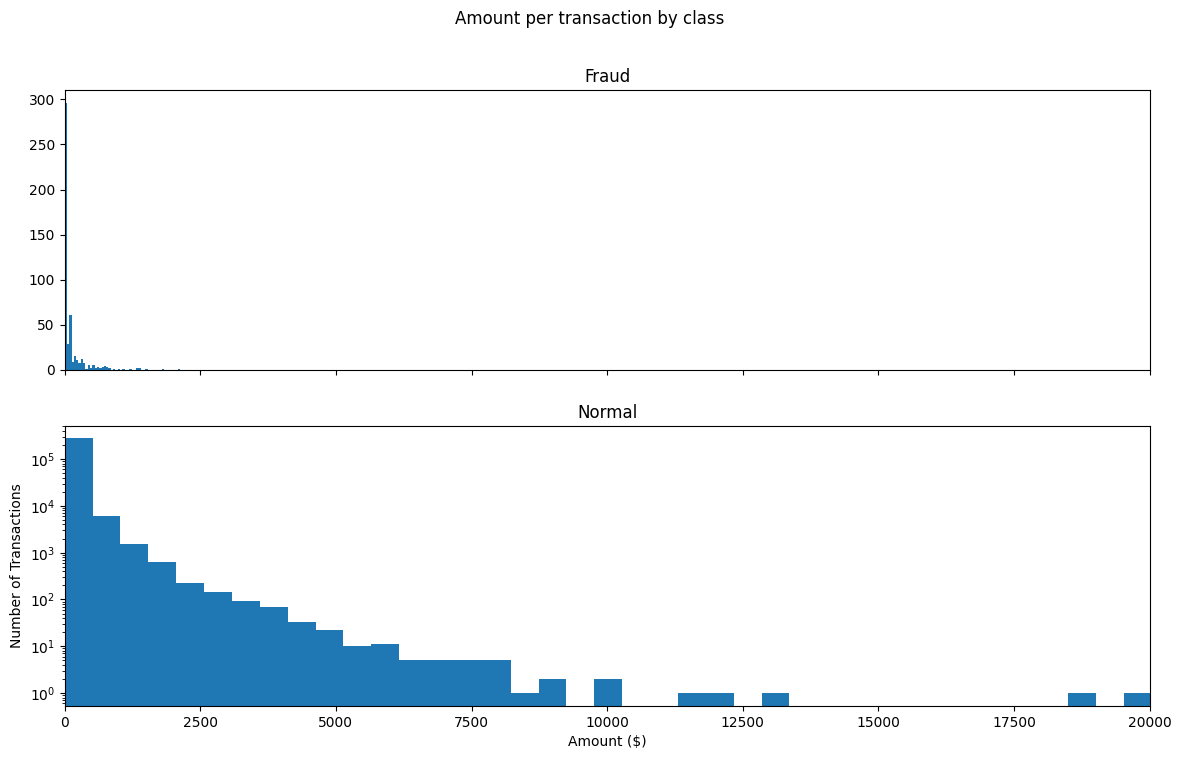

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins=bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins=bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

#sampling of the data

In [93]:
RANDOM_SEED = 120
outlier_fraction = 0.03

In [94]:
# Sample 10% of the data
data1 = data.sample(frac=0.1, random_state=RANDOM_SEED)
print("Sampled Data Shape:", data1.shape)

Sampled Data Shape: (28481, 31)


In [95]:
Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]


In [96]:
# Take a random 10% sample of the data and store it in data1
X_sample = data1.drop(columns=['Class'])  # Features
Y_sample = data1['Class']

outlier_fraction = len(Fraud)/float(len(Valid))

In [97]:
print(f"Outlier Fraction: {outlier_fraction:.4f}")
print(f"Fraud Cases: {len(Fraud)}")
print(f"Valid Cases: {len(Valid)}")

Outlier Fraction: 0.0018
Fraud Cases: 50
Valid Cases: 28431


# heatmap for correlation

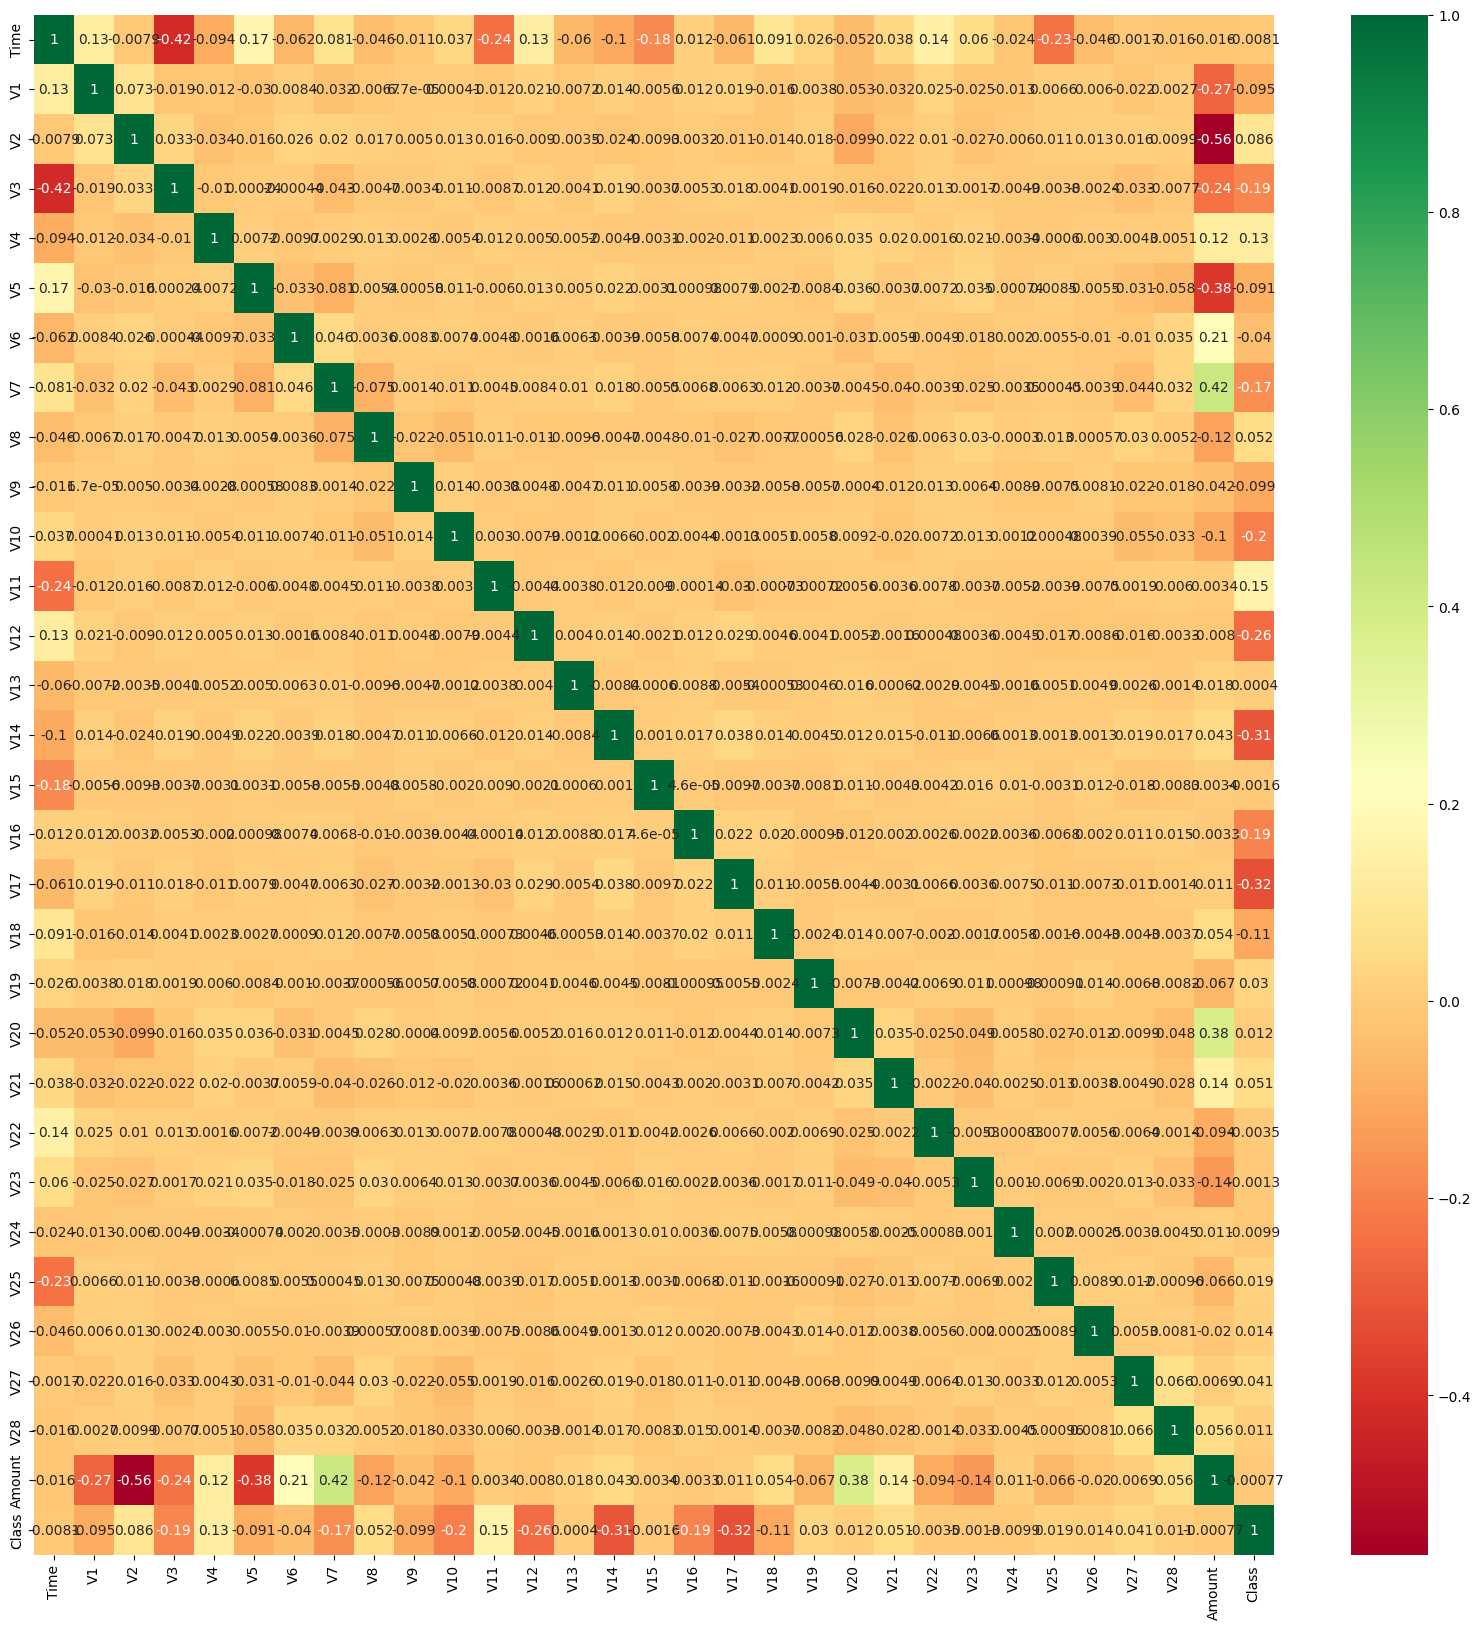

In [98]:
import seaborn as sns
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20, 20))
sns.heatmap(data1[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.show()

#Creating independent and Dependent Features

In [99]:
# Compute outlier fraction
outlier_fraction = len(fraud) / float(len(normal))
print(f"Outlier Fraction: {outlier_fraction:.4f}")
print(f"Fraud Cases: {len(fraud)}")
print(f"Valid Cases: {len(normal)}")

Outlier Fraction: 0.0017
Fraud Cases: 492
Valid Cases: 284315


In [100]:
columns = data1.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]

In [101]:
target = "Class"
#state = np.random.RandomState(42)

In [102]:
X = data1[columns]
Y = data1[target]
#X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

In [103]:
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


# Model prediction

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [105]:
# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_sample, Y_sample, test_size=0.2, random_state=RANDOM_SEED, stratify=Y_sample)

In [106]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
print("Training set shape :", X_train.shape)
print("Training labels shape :", Y_train.shape)
print("Test set shape :", X_test.shape)
print("Test labels shape :", Y_test.shape)

Training set shape : (22784, 30)
Training labels shape : (22784,)
Test set shape : (5697, 30)
Test labels shape : (5697,)


In [113]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

# Train Isolation Forest without hyperparameter tuning
best_if = IsolationForest(random_state=RANDOM_SEED, n_estimators=5000, max_samples=700, contamination=0.03)
best_if.fit(X_train_scaled)

# Train One-Class SVM without hyperparameter tuning
best_svm = OneClassSVM(gamma=0.09, nu=0.001, kernel='rbf')
best_svm.fit(X_train_scaled)

OneClassSVM(gamma=0.09, nu=0.001)


Training Isolation Forest...
Isolation Forest - Training Set:
Accuracy Score: 0.9709445224719101
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     22744
           1       0.05      0.78      0.09        40

    accuracy                           0.97     22784
   macro avg       0.52      0.87      0.54     22784
weighted avg       1.00      0.97      0.98     22784

Isolation Forest - Test Set:
Accuracy Score: 0.9712129190802177
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      5687
           1       0.05      0.90      0.10        10

    accuracy                           0.97      5697
   macro avg       0.53      0.94      0.54      5697
weighted avg       1.00      0.97      0.98      5697



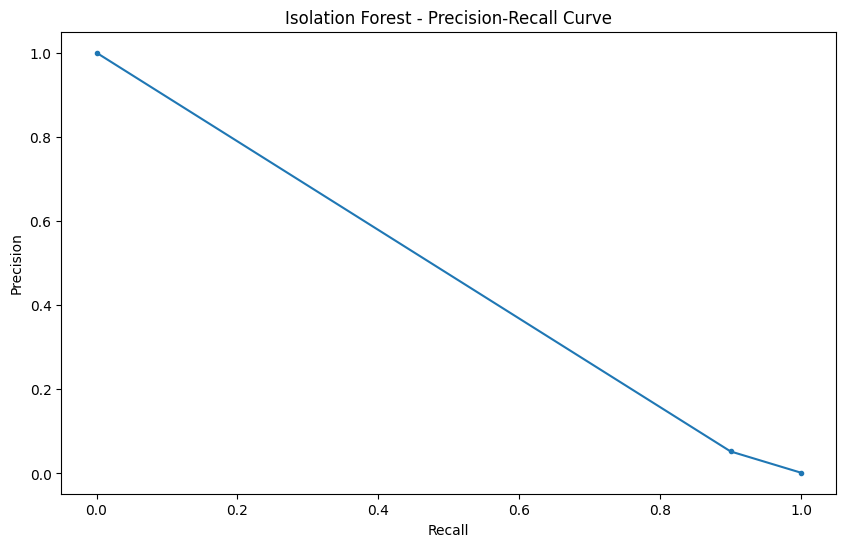

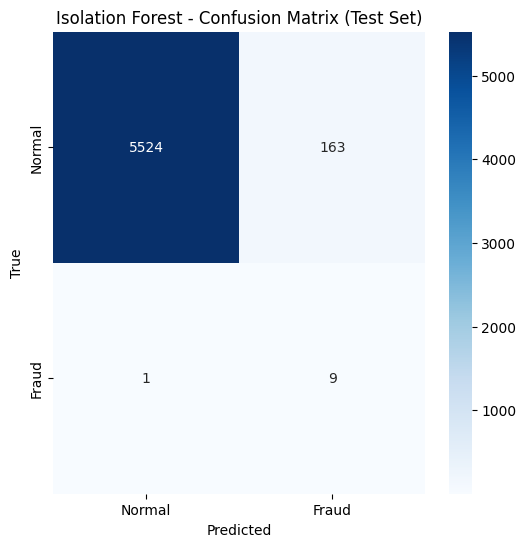

Isolation Forest - Cross-validated F1 Score: nan

Training One-Class SVM...
One-Class SVM - Training Set:
Accuracy Score: 0.948560393258427
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     22744
           1       0.01      0.42      0.03        40

    accuracy                           0.95     22784
   macro avg       0.51      0.69      0.50     22784
weighted avg       1.00      0.95      0.97     22784

One-Class SVM - Test Set:
Accuracy Score: 0.9076707038792347
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      5687
           1       0.02      1.00      0.04        10

    accuracy                           0.91      5697
   macro avg       0.51      0.95      0.49      5697
weighted avg       1.00      0.91      0.95      5697



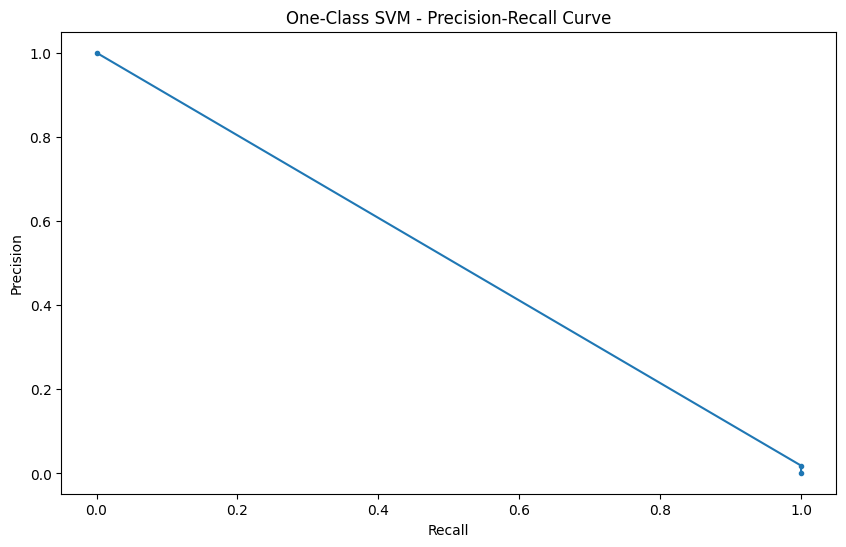

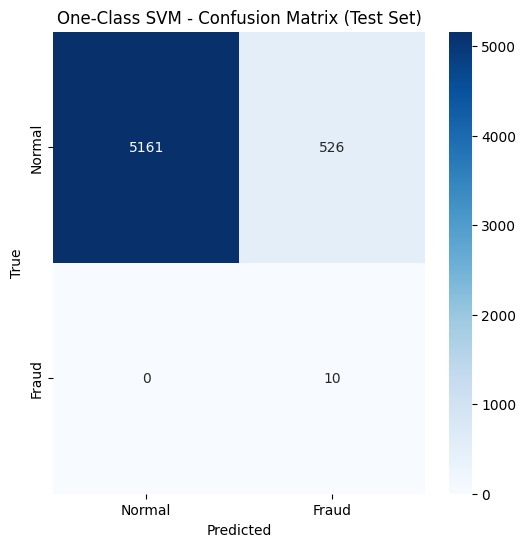

One-Class SVM - Cross-validated F1 Score: nan


In [114]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, confusion_matrix
from sklearn.model_selection import cross_val_score

# Suppress warnings from scikit-learn and other sources
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')
warnings.filterwarnings("ignore", category=FutureWarning, module='sklearn')

# Define models with the best parameters found by GridSearchCV
classifiers = {
    "Isolation Forest": best_if,
    "One-Class SVM": best_svm
}

# Train models and evaluate performance
for clf_name, clf in classifiers.items():
    print(f"\nTraining {clf_name}...")

    # Fit the model on training data
    clf.fit(X_train_scaled)

    # Predictions for both training and test set
    y_pred_train = clf.predict(X_train_scaled)
    y_pred_test = clf.predict(X_test_scaled)

    # Convert predictions: 1 -> Normal, -1 -> Fraud
    y_pred_train = np.where(y_pred_train == 1, 0, 1)  # Convert to binary fraud detection labels
    y_pred_test = np.where(y_pred_test == 1, 0, 1)

    # Evaluation on training set
    print(f"{clf_name} - Training Set:")
    print("Accuracy Score:", accuracy_score(Y_train, y_pred_train))  # Use Y_train (original, no SMOTE)
    print("Classification Report:")
    print(classification_report(Y_train, y_pred_train))  # Use Y_train (original, no SMOTE)

    # Evaluation on test set
    print(f"{clf_name} - Test Set:")
    print("Accuracy Score:", accuracy_score(Y_test, y_pred_test))
    print("Classification Report:")
    print(classification_report(Y_test, y_pred_test))

    # Plot precision-recall curve (ensure proper handling of the curve)
    try:
        precision, recall, thresholds = precision_recall_curve(Y_test, y_pred_test)
        plt.figure(figsize=(10, 6))
        plt.plot(recall, precision, marker='.')
        plt.title(f'{clf_name} - Precision-Recall Curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.show()
    except ValueError:
        # In case precision_recall_curve fails due to constant predictions
        print(f"Precision-Recall curve could not be plotted for {clf_name}.")

    # Confusion Matrix
    cm_test = confusion_matrix(Y_test, y_pred_test)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
    plt.title(f"{clf_name} - Confusion Matrix (Test Set)")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Cross-Validation Score (F1 Score)
    try:
        cross_val_f1 = cross_val_score(clf, X_train_scaled, Y_train, cv=5, scoring='f1')  # Use Y_train (original, no SMOTE)
        print(f"{clf_name} - Cross-validated F1 Score: {cross_val_f1.mean()}")
    except Exception as e:
        print(f"Cross-validation failed for {clf_name}: {e}")


In [120]:
clf_name = "Local Outlier Factor"
clf = LocalOutlierFactor(n_neighbors=20, contamination=outlier_fraction)


Evaluating Local Outlier Factor...
Training Set:
Accuracy Score: 0.9920119382022472
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     22744
           1       0.16      0.82      0.27        40

    accuracy                           0.99     22784
   macro avg       0.58      0.91      0.63     22784
weighted avg       1.00      0.99      0.99     22784

Test Set:
Accuracy Score: 0.9880638932771634
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5687
           1       0.11      0.80      0.19        10

    accuracy                           0.99      5697
   macro avg       0.55      0.89      0.59      5697
weighted avg       1.00      0.99      0.99      5697



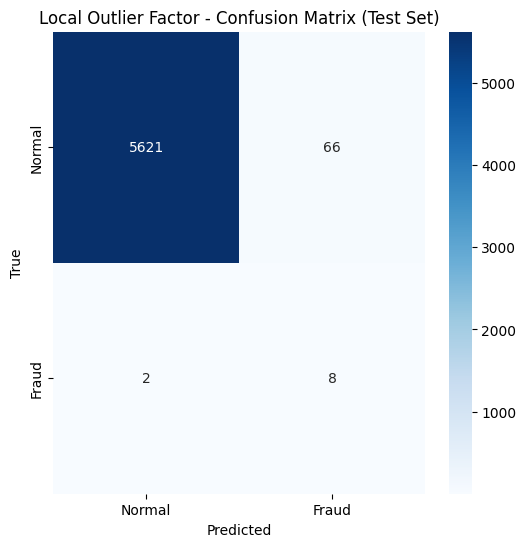

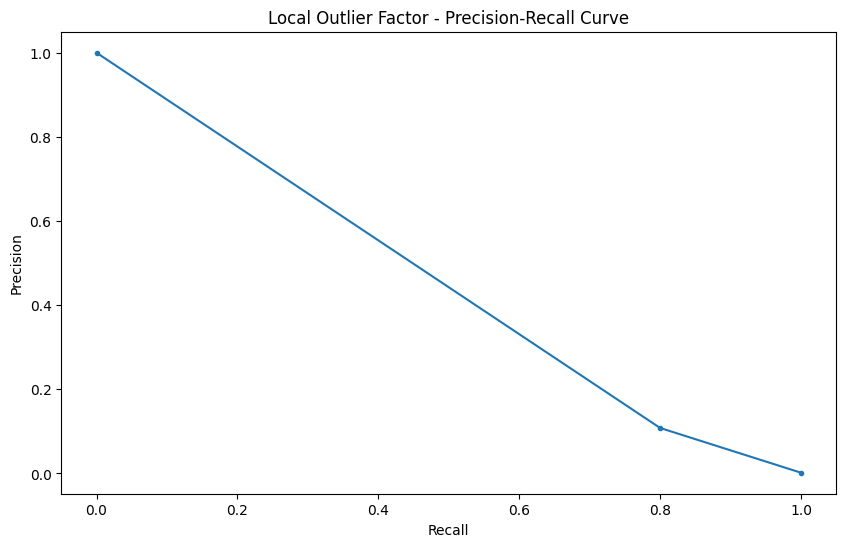

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor  # Corrected import

# Set Random Seed and Outlier Fraction for Precision
RANDOM_SEED = 100
outlier_fraction = 0.01  # Reduce contamination for better precision

# Assuming X_sample and Y_sample are already defined, split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_sample, Y_sample, test_size=0.2, random_state=RANDOM_SEED)

# Standardize the data (important for models like LOF)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models with hyperparameters adjusted for precision
clf = LocalOutlierFactor(n_neighbors=50, contamination=outlier_fraction, novelty=True)

# Fit the model to the training set
clf.fit(X_train_scaled)

# Use score_samples to get decision values for test data
y_score_test = clf.score_samples(X_test_scaled)

# Predict on the training and test sets (convert to binary labels: 1 -> Fraud, 0 -> Normal)
y_pred_train = clf.predict(X_train_scaled)
y_pred_test = clf.predict(X_test_scaled)
y_pred_train = np.where(y_pred_train == 1, 0, 1)  # Convert 1 -> Normal, -1 -> Fraud
y_pred_test = np.where(y_pred_test == 1, 0, 1)  # Convert 1 -> Normal, -1 -> Fraud
# Print accuracy and classification report
print(f"\nEvaluating Local Outlier Factor...")
print("Training Set:")
print("Accuracy Score:", accuracy_score(Y_train, y_pred_train))
print("Classification Report:")
print(classification_report(Y_train, y_pred_train))
print("Test Set:")
print("Accuracy Score:", accuracy_score(Y_test, y_pred_test))
print("Classification Report:")
print(classification_report(Y_test, y_pred_test))
# Confusion Matrix for test set
cm_test = confusion_matrix(Y_test, y_pred_test)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title(f"Local Outlier Factor - Confusion Matrix (Test Set)")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# ROC Curve - Use score_samples for LOF with novelty=True
fpr, tpr, _ = roc_curve(Y_test, y_score_test)
roc_auc = auc(fpr, tpr)
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(Y_test, y_pred_test)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.')
plt.title('Local Outlier Factor - Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
